In [32]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [25]:
#Learn how to read a .xls file by creating a dataframe using pandas
# Reading the datasets
df= pd.read_csv('C:/Users/Sai Sarath/Desktop/Sem6/state_level_latest.csv')
df_india = df.copy()
df

,state,confirmed,recovered,deaths
0,Maharashtra,30706,7088,1135
1,Tamil Nadu,10585,3538,74
2,Gujarat,10989,4308,625
3,Delhi,9333,3926,129
4,Madhya Pradesh,4790,2315,243
5,Rajasthan,5030,2991,128
6,Uttar Pradesh,4258,2441,104
7,West Bengal,2576,892,232
8,Andhra Pradesh,2355,1353,49
9,Punjab,1946,1257,32


In [26]:
total_cases = df['confirmed'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (16th May, 2020):', total_cases)

Total number of confirmed COVID 2019 cases across India till date (16th May, 2020): 90813


In [96]:
#Learn how to highlight your dataframe
df.style.background_gradient(cmap='summer')

,state,confirmed,recovered,deaths,Total Active
0,Maharashtra,30706,7088,1135,22483
1,Tamil Nadu,10585,3538,74,6973
2,Gujarat,10989,4308,625,6056
3,Delhi,9333,3926,129,5278
4,Madhya Pradesh,4790,2315,243,2232
5,Rajasthan,5030,2991,128,1911
6,Uttar Pradesh,4258,2441,104,1713
7,West Bengal,2576,892,232,1452
8,Andhra Pradesh,2355,1353,49,953
9,Punjab,1946,1257,32,657


In [97]:
#Total Active  is the Total cases - (Number of death + Cured)
df['Total Active'] = df['confirmed'] - (df['deaths'] + df['recovered'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('state')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='summer')

Total number of active COVID 2019 cases across India: 53667


,Total Active
state,
Maharashtra,22483
Tamil Nadu,6973
Gujarat,6056
Delhi,5278
Madhya Pradesh,2232
Rajasthan,1911
Uttar Pradesh,1713
West Bengal,1452
Andhra Pradesh,953


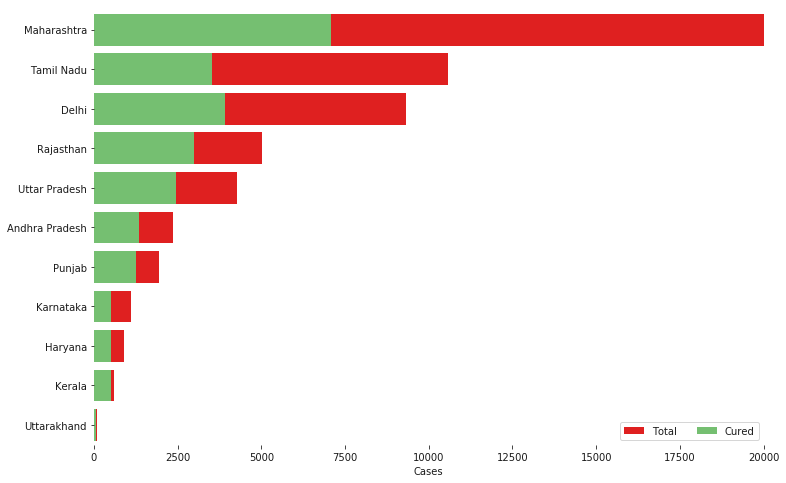

In [46]:
India_coord = pd.read_csv('C:/Users/Sai Sarath/Desktop/Sem6/Indian Coordinates.csv')
df_full = pd.merge(India_coord,df,on='state')
#Learn how to use Seaborn for visualization
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['state','confirmed','recovered','deaths']]
data.sort_values('confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="confirmed", y="state", data=data,label="Total", color="red")

sns.set_color_codes("muted")
sns.barplot(x="recovered", y="state", data=data, label="Cured", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 20000), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

In [70]:
#Learn how to create interactive graphs using plotly
# import plotly.graph_objects as go
# Rise of COVID-19 cases in India
fig = go.Figure()
dbd_India=pd.read_csv('C:/Users/Sai Sarath/Downloads/nation_level_daily.csv')
fig.add_trace(go.Scatter(x=dbd_India['date'], y = dbd_India['totalconfirmed'], mode='lines+markers',name='Total Cases'))
fig.add_trace(go.Scatter(x=dbd_India['date'], y = dbd_India['totalrecovered'], mode='lines+markers',name='Total Cured',line_color='green'))
fig.add_trace(go.Scatter(x=dbd_India['date'], y = dbd_India['totaldeceased'], mode='lines+markers',name='Total Death',line_color='red'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# New COVID-19 cases reported daily in India

import plotly.express as px
fig = px.bar(dbd_India, x="date", y="dailyconfirmed", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [72]:
#Learn how to create interactive graphs using plotly
# import plotly.graph_objects as go
# Rise of COVID-19 cases in India
s=input()
sn=pd.read_excel('C:/Users/Sai Sarath/Desktop/Sem6/complete.xlsm',parse_dates=True,sheet_name=s)
fig=go.Figure(data=go.Scatter(x=sn['Date'], y = sn['Total Confirmed cases'], mode='lines+markers',name='Total Cases'))
fig.add_trace(go.Scatter(x=sn['Date'], y = sn['Cured/Discharged/Migrated'], mode='lines+markers',name='Total Cured',line_color='green'))
fig.add_trace(go.Scatter(x=sn['Date'], y = sn['Death'], mode='lines+markers',name='Total Death',line_color='red'))
fig.update_layout(title_text='Trend of Coronavirus Cases in '+s+' (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# New COVID-19 cases reported daily in India

import plotly.express as px
fig = px.bar(sn, x="Date", y="Total Confirmed cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in '+s+' on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

Odisha
